0,63 по метрике R2

In [ ]:
!pip install statsmodels==0.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 8.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# !pip install statsmodels==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
train = pd.read_csv("gdrive/My Drive/Colab Notebooks/Samsung Bootcamp/Kaggle/5/train.csv")
train

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   total     34946 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [ ]:
train.describe()

,total
count,34946.000000
mean,185124.542759
std,45576.747296
min,-2683.028891
25%,155648.570400
50%,195441.459350
75%,218380.242775
max,302203.609200


In [ ]:
train

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [ ]:
#train.fillna(method='bfill', inplace=True)
train.fillna(method='bfill', inplace=True)
train

,datetime,total
0,01.01.2005 00:00:00,154139.8084
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [ ]:
# train.replace(np.nan, 0, inplace=True)
# train

In [ ]:
train = train.set_index(['datetime'])

### Просмотр аналитик

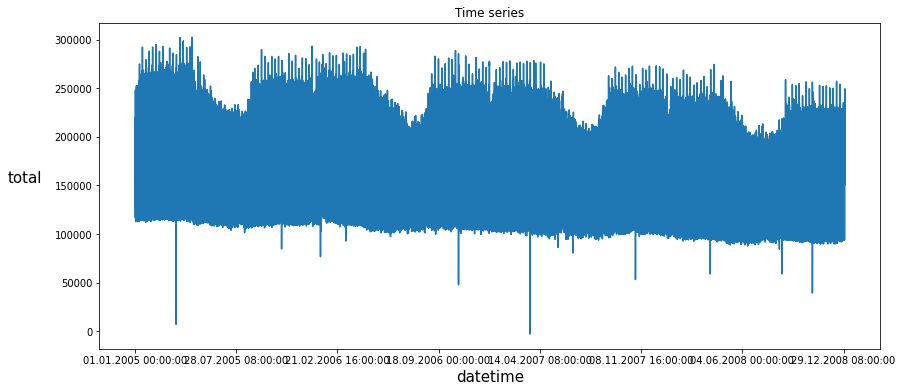

In [ ]:
import matplotlib.pyplot as plt
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('Date', fontsize=15)
plt.ylabel('total', rotation=0, labelpad=30, fontsize=15)
train['total'].plot();

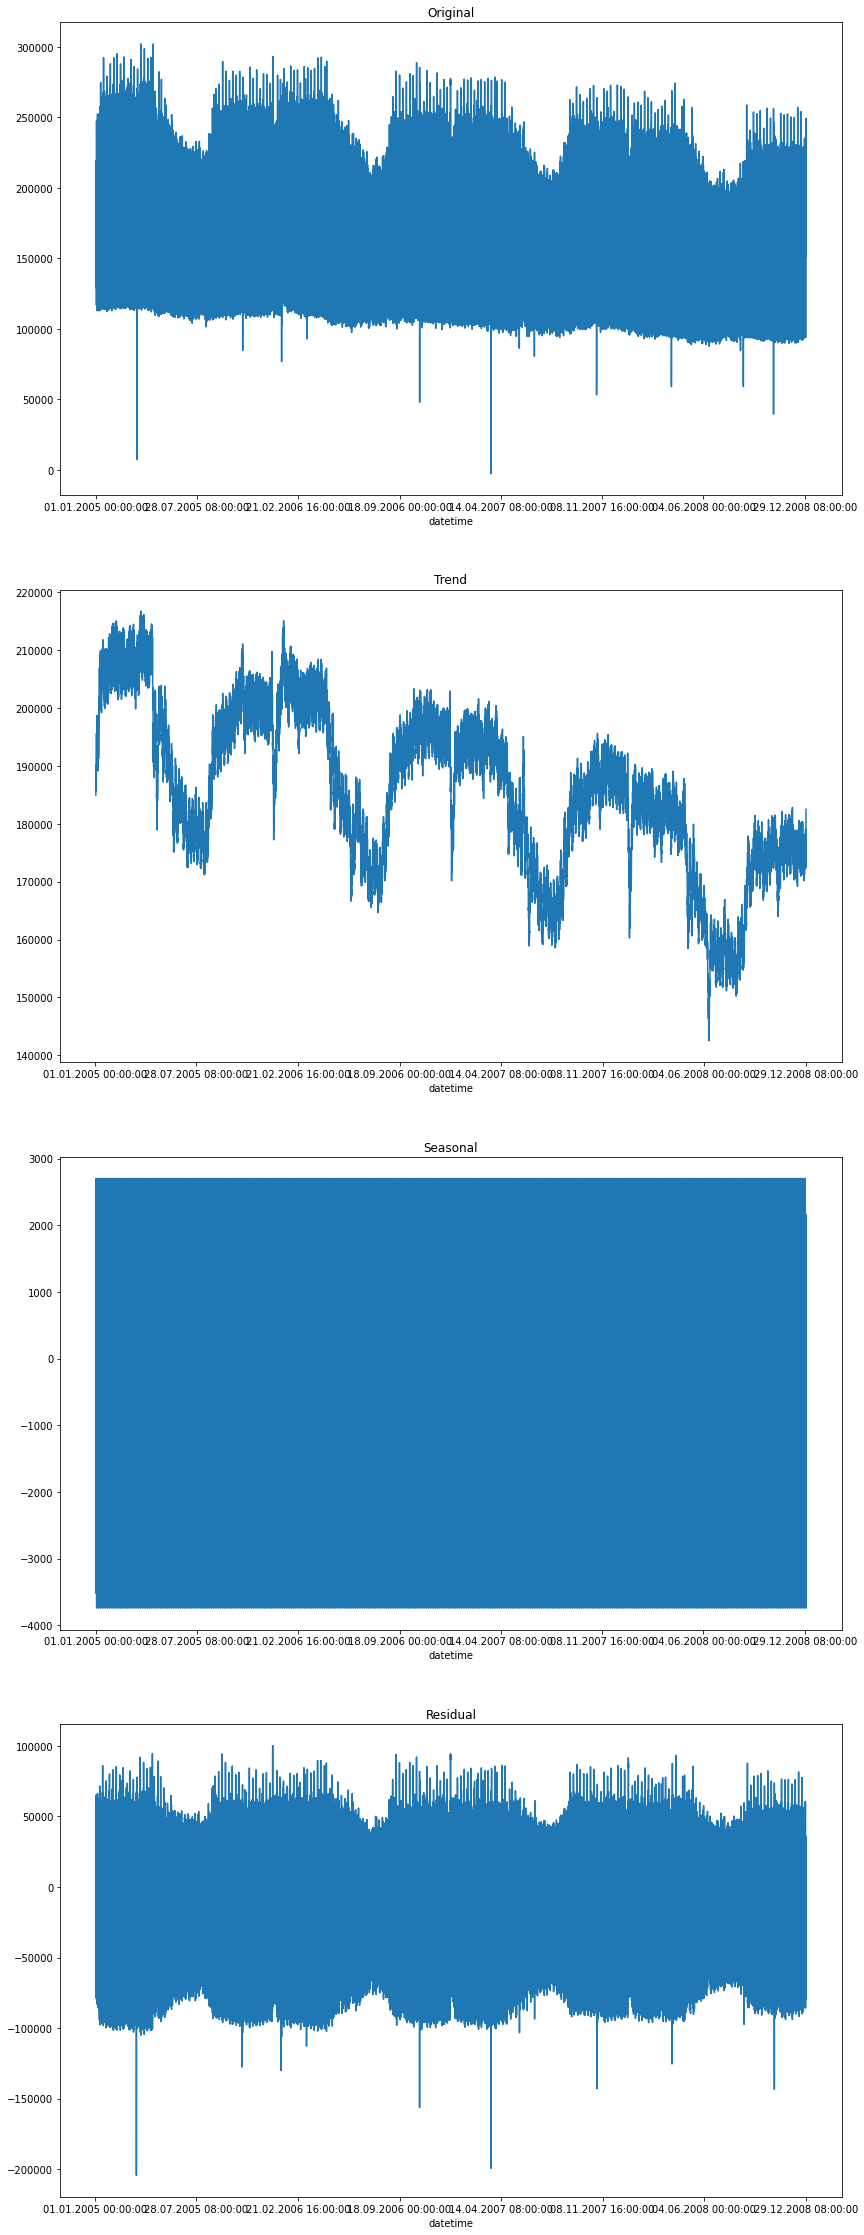

In [ ]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(train[['total']], period=90)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

### автокореляция

In [ ]:
from statsmodels.tsa.stattools import acf
# Получил 'сырые' значения автокорреляций
acf(train['total'], nlags=60, fft=False)

array([ 1.        ,  0.8937686 ,  0.64798017,  0.34586646,  0.05563105,
       -0.17528258, -0.31275317, -0.33844173, -0.26929594, -0.15202779,
       -0.03800061,  0.03860899,  0.06245792,  0.0281712 , -0.05514292,
       -0.16901835, -0.28146714, -0.34454948, -0.31460214, -0.17671507,
        0.04884948,  0.32592937,  0.60769872,  0.83299454,  0.92655676,
        0.84062234,  0.6188555 ,  0.33715583,  0.05935796, -0.1658855 ,
       -0.30313248, -0.33261145, -0.26962719, -0.15714032, -0.04467914,
        0.03226665,  0.0564575 ,  0.02212776, -0.06114317, -0.17264171,
       -0.27929438, -0.33554934, -0.30115054, -0.16259143,  0.05903585,
        0.32576696,  0.58999273,  0.79454758,  0.87629278,  0.79783977,
        0.59437604,  0.32985721,  0.06262835, -0.15890593, -0.29701021,
       -0.33072726, -0.27322758, -0.16444967, -0.05174965,  0.02846502,
        0.05701014])

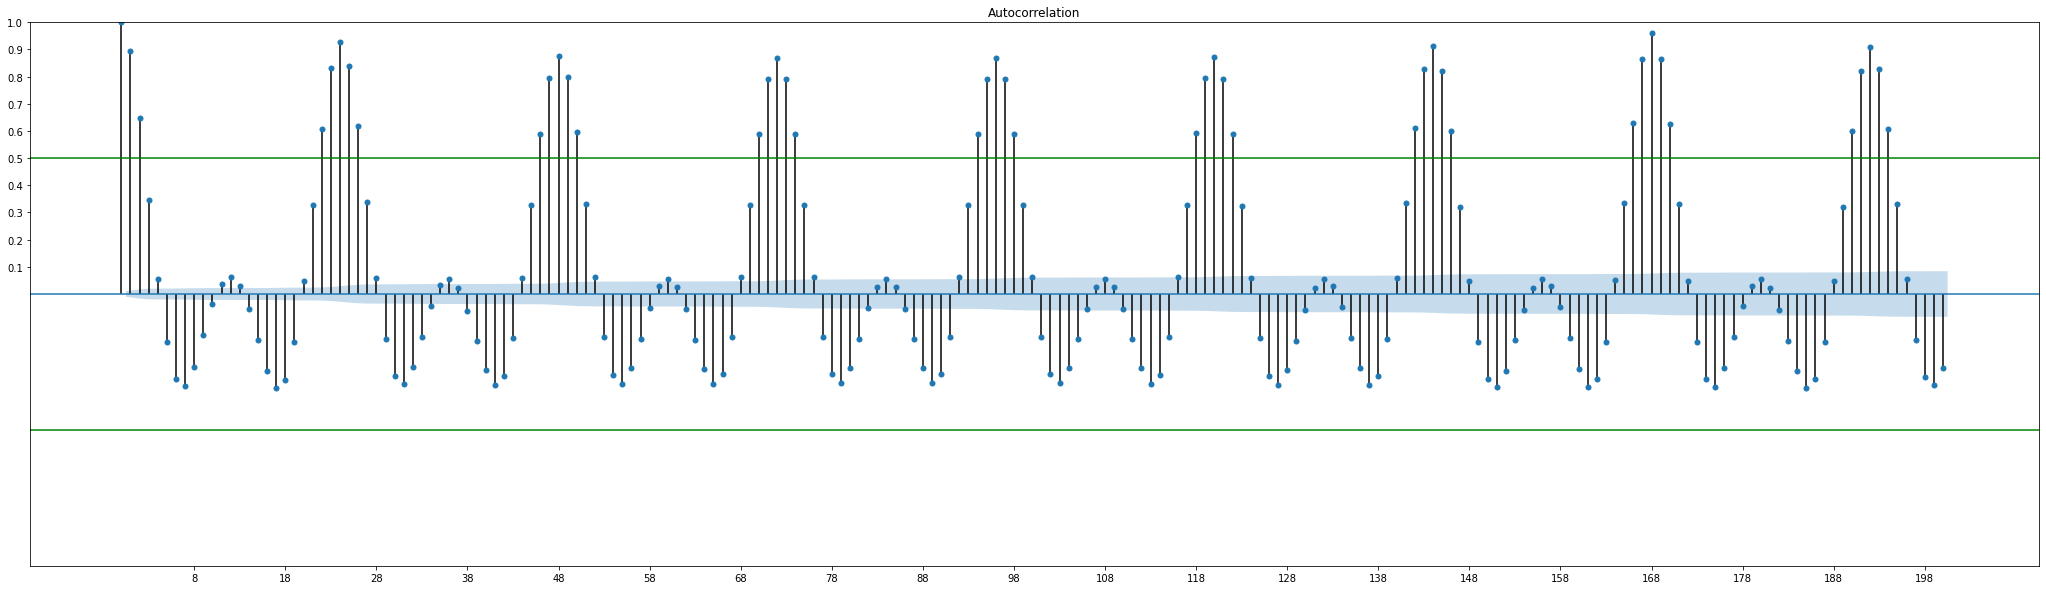

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
fig, ax = plt.subplots(figsize=(36,10))
plot_acf(train['total'], lags=200, ax=ax)
# plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(8, 201, 10))
plt.axhline(y=0.5, color="green")
plt.axhline(y=-0.5, color="green")
plt.show()

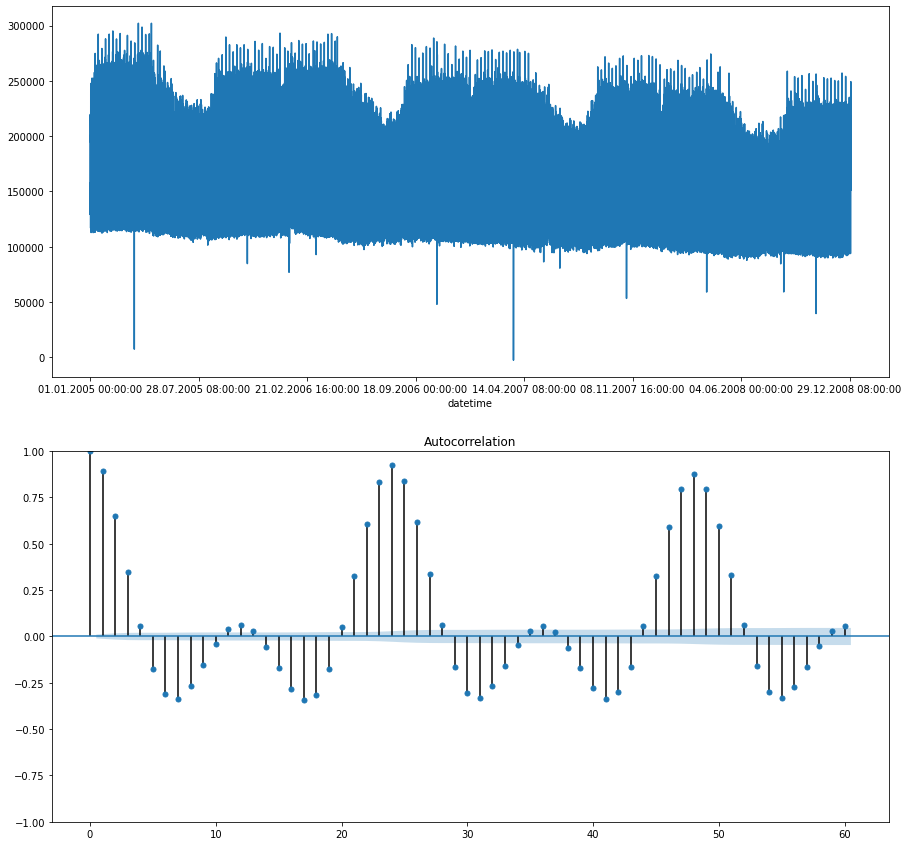

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
train['total'].plot(ax=ax[0])
plot_acf(train['total'], lags=60, ax=ax[1]);

In [ ]:
series = train.total.values

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(series, lags=840).fit()

In [ ]:
prediction = ar.predict(start=35064, end=35064+4344-1, dynamic=False)

In [ ]:
prediction

array([131003.72119178, 113510.12822808, 110834.47030013, ...,
       220008.75735321, 217097.38950116, 196409.96170561])

In [ ]:
sample = pd.read_csv("gdrive/My Drive/Colab Notebooks/Samsung Bootcamp/Kaggle/5/sample.csv")
sample

,datetime,total
0,01.01.2009 00:00:00,0
1,01.01.2009 01:00:00,0
2,01.01.2009 02:00:00,0
3,01.01.2009 03:00:00,0
4,01.01.2009 04:00:00,0
...,...,...
4339,30.06.2009 19:00:00,0
4340,30.06.2009 20:00:00,0
4341,30.06.2009 21:00:00,0
4342,30.06.2009 22:00:00,0


In [ ]:
sample["total"] = prediction
sample

,datetime,total
0,01.01.2009 00:00:00,131003.721192
1,01.01.2009 01:00:00,113510.128228
2,01.01.2009 02:00:00,110834.470300
3,01.01.2009 03:00:00,111321.861052
4,01.01.2009 04:00:00,110437.023083
...,...,...
4339,30.06.2009 19:00:00,209541.213708
4340,30.06.2009 20:00:00,214578.749927
4341,30.06.2009 21:00:00,220008.757353
4342,30.06.2009 22:00:00,217097.389501


In [ ]:
sample = sample.set_index(['datetime'])

In [ ]:
sample

,total
datetime,
01.01.2009 00:00:00,131003.721192
01.01.2009 01:00:00,113510.128228
01.01.2009 02:00:00,110834.470300
01.01.2009 03:00:00,111321.861052
01.01.2009 04:00:00,110437.023083
...,...
30.06.2009 19:00:00,209541.213708
30.06.2009 20:00:00,214578.749927
30.06.2009 21:00:00,220008.757353


In [ ]:
sample.to_csv("prediction.csv")

In [ ]:
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Обучение

In [ ]:
# df_train.tail(60)

In [ ]:
df_train = train['total'].iloc[:-8784]
df_test = train['total'].iloc[-8784:]

In [ ]:
df_train.shape

(26280,)

In [ ]:
df_test.shape

(8784,)

In [ ]:
df_train

datetime
01.01.2005 00:00:00    154139.8084
01.01.2005 01:00:00    154139.8084
01.01.2005 02:00:00    157818.3593
01.01.2005 03:00:00    149310.6991
01.01.2005 04:00:00    138282.0380
                          ...     
31.12.2007 19:00:00    260527.7595
31.12.2007 20:00:00    257108.4946
31.12.2007 21:00:00    239399.4464
31.12.2007 22:00:00    209317.3679
31.12.2007 23:00:00    161115.2239
Name: total, Length: 26280, dtype: float64

In [ ]:
df_test

datetime
01.01.2008 00:00:00    125498.1002
01.01.2008 01:00:00    137546.6715
01.01.2008 02:00:00    138079.8508
01.01.2008 03:00:00    132095.1101
01.01.2008 04:00:00    115413.8404
                          ...     
31.12.2008 19:00:00    249376.3608
31.12.2008 20:00:00    246510.5725
31.12.2008 21:00:00    226469.4133
31.12.2008 22:00:00    199907.3942
31.12.2008 23:00:00    151086.2414
Name: total, Length: 8784, dtype: float64

В данном примере мы решаем задачу регрессии и для её решения воспользуемся алгоритмом ***Линейной регрессии***.

In [ ]:
# !pip install statsmodels==0.13.1

In [ ]:
# импортируем необходмимые библиотеки
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_train, lags=504).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [ ]:
forecasts = model.forecast(8784).tolist()
test_values = df_test.tolist()
# for index in range(len(forecasts)):
#  difference = forecasts[index] - test_values[index]
#  print(forecasts[index], test_values[index], difference)

In [ ]:
print('R2 score:', r2_score(forecasts, df_test))

R2 score: 0.06751133716168678


с заменой nan 0,

168 lags на kaggle = 0.63 R2 score: 0.21420578734045914

200 lags Score: 0.60675 R2 score: 0.06751133716168678

504 lags Score: 0.70769 R2 score: 0.3776560908721095

С заменой nan на значение следующего элемента

504 lags Score: 0.70953 R2 score: 0.5928895017695182



In [ ]:
max_val = max(history.values())
final_dict = {k:v for k, v in history.items() if v == max_val}

In [ ]:
final_dict

{840: 0.6173560338684105}

0 | 0.0 | 
1 | -5919.915666864451 | 
2 | -941.4019177404507 | 
3 | -998.3629690000258 | 
4 | -915.7117786509684 | 
5 | -891.8852399167279 | 
6 | -941.2920877811063 | 
7 | -956.5415865497677 | 
8 | -951.9383643488128 | 
9 | -898.8836798961673 | 
10 | -782.0197521377487 | 
11 | -726.65410961615 | 
12 | -657.3912060722556 | 
13 | -544.5060769416032 | 
14 | -485.413536001677 | 
15 | -434.5834837019032 | 
16 | -415.57436701138704 | 
17 | -414.3499993038431 | 
18 | -290.00818416021684 | 
19 | -186.08311336142793 | 
20 | -123.460618014936 | 
21 | -65.55255109573201 | 
22 | -29.846062428130786 | 
23 | -14.846005292029336 | 
24 | -14.282270966839254 | 
25 | -17.368096346779065 | 
26 | -17.784064732439663 | 
27 | -18.084557674236507 | 
28 | -17.69444382464654 | 
29 | -17.303452100615228 | 
30 | -16.42233752805041 | 
31 | -15.637143451039403 | 
32 | -14.210651044279821 | 
33 | -13.870293699000909 | 
34 | -14.131488132519056 | 
35 | -14.458524962493037 | 
36 | -14.751032756612178 | 
37 | -14.79592

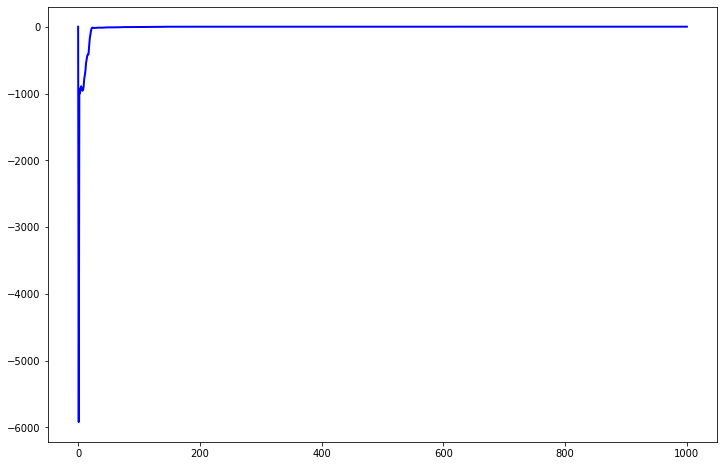

In [ ]:
import warnings
warnings.filterwarnings("ignore")
history = {}
for n in range(0, 1001):
  model = AutoReg(df_train, lags=n).fit()
  # обучение модели
  forecasts = model.forecast(8784).tolist()
  # предсказание ответов для тестовой выборки
  history[n] = r2_score(forecasts, df_test)
  print(str(n), '|', end=' ')
  print(f'{r2_score(forecasts, df_test)} |', end=' \n')
  # print(f'{precision_score(y_test, answers_pred)} |', end=' ')
  # print(f'{recall_score(y_test, answers_pred)}')
plt.figure(figsize=(12, 8))
plt.plot(list(history.keys()), list(history.values()), color='blue', linewidth=2);

202 | 0.050673427667503934 | 
203 | 0.04819360224185032 | 
204 | 0.05184544336421115 | 
205 | 0.050733678530275994 | 
206 | 0.05078309602485975 | 
207 | 0.046215688687904155 | 
208 | 0.03448373045604047 | 
209 | 0.025747023640973365 | 
210 | 0.025776432240517178 | 
211 | 0.024133786783373856 | 
212 | 0.025875719837472833 | 
213 | 0.029705427090411796 | 
214 | 0.012312526473991059 | 
215 | -0.0020982485302494247 | 
216 | -0.004360581925779483 | 
217 | -0.008658332742487396 | 
218 | -0.013181148655220909 | 
219 | -0.012946112198315207 | 
220 | -0.011267081690378822 | 
221 | -0.005598458154557395 | 
222 | -0.002885400125426596 | 
223 | -0.0013175588356677537 | 
224 | -0.0006179050885570803 | 
225 | 0.0012647073576665946 | 
226 | -0.0019126224135632697 | 
227 | -0.005894384151030829 | 
228 | -0.004487452518095569 | 
229 | -0.0055176266767642534 | 
230 | -0.0064272324271452685 | 
231 | -0.0030743461275106743 | 
232 | -0.004886634328847395 | 
233 | -0.008419405308818462 | 
234 | -0.001062720

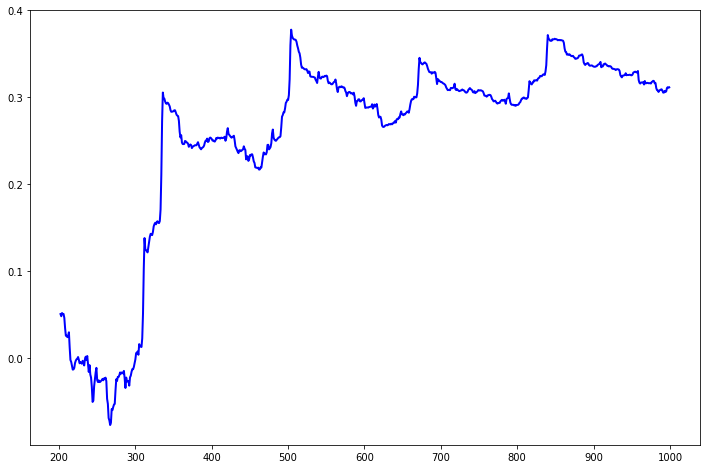

In [ ]:
import warnings
warnings.filterwarnings("ignore")
history = {}
for n in range(202, 1000):
  model = AutoReg(df_train, lags=n).fit()
  # обучение модели
  forecasts = model.forecast(8784).tolist()
  # предсказание ответов для тестовой выборки
  history[n] = r2_score(forecasts, df_test)
  print(str(n), '|', end=' ')
  print(f'{r2_score(forecasts, df_test)} |', end=' \n')
  # print(f'{precision_score(y_test, answers_pred)} |', end=' ')
  # print(f'{recall_score(y_test, answers_pred)}')
plt.figure(figsize=(12, 8))
plt.plot(list(history.keys()), list(history.values()), color='blue', linewidth=2);

In [ ]:
ar = AutoReg(df_train, lags=504).fit()

NameError: ignored

In [ ]:
prediction = ar.predict(start=26280, end=35064+4344-1, dynamic=False)

In [ ]:
print('R2 score:', r2_score(forecasts, df_test))